<a href="https://colab.research.google.com/github/samula98/proj6_v00/blob/main/proj6_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Image Classification with Deep Learning


## Goals

Made a model that will be able to determine whether an image contains a cat or dog.

## Methods

## Problem Definition

* Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

* Load necessary packages.


# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



In [1]:
import pandas as pd
import numpy as np
import pickle
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



* X.pickle

In [2]:
url_X = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'

In [3]:
!curl -O {url_X}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  237M  100  237M    0     0  44.5M      0  0:00:05  0:00:05 --:--:-- 50.9M


In [4]:
data_X = pd.read_pickle(url_X)
data_X

array([[[[ 95],
         [ 94],
         [ 98],
         ...,
         [170],
         [172],
         [171]],

        [[ 92],
         [ 91],
         [ 95],
         ...,
         [170],
         [172],
         [171]],

        [[ 89],
         [ 91],
         [ 92],
         ...,
         [165],
         [169],
         [169]],

        ...,

        [[ 84],
         [ 76],
         [ 73],
         ...,
         [135],
         [164],
         [154]],

        [[ 82],
         [ 79],
         [ 71],
         ...,
         [142],
         [134],
         [153]],

        [[ 80],
         [ 85],
         [ 85],
         ...,
         [151],
         [146],
         [138]]],


       [[[171],
         [154],
         [139],
         ...,
         [185],
         [187],
         [188]],

        [[146],
         [140],
         [129],
         ...,
         [187],
         [187],
         [188]],

        [[128],
         [132],
         [128],
         ...,
         [186],
         [

In [5]:
data_X.shape

(24946, 100, 100, 1)

In [6]:
type(data_X)

numpy.ndarray

* y.pickle

In [7]:
url_y = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

In [8]:
!curl -O {url_y}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49948  100 49948    0     0   160k      0 --:--:-- --:--:-- --:--:--  160k


In [9]:
data_y = pd.read_pickle(url_y)
data_y

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [10]:
type(data_y)

list

In [11]:
len(data_y)

24946

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [12]:
data_Xscaled = data_X / 255
data_Xscaled

array([[[[0.37254902],
         [0.36862745],
         [0.38431373],
         ...,
         [0.66666667],
         [0.6745098 ],
         [0.67058824]],

        [[0.36078431],
         [0.35686275],
         [0.37254902],
         ...,
         [0.66666667],
         [0.6745098 ],
         [0.67058824]],

        [[0.34901961],
         [0.35686275],
         [0.36078431],
         ...,
         [0.64705882],
         [0.6627451 ],
         [0.6627451 ]],

        ...,

        [[0.32941176],
         [0.29803922],
         [0.28627451],
         ...,
         [0.52941176],
         [0.64313725],
         [0.60392157]],

        [[0.32156863],
         [0.30980392],
         [0.27843137],
         ...,
         [0.55686275],
         [0.5254902 ],
         [0.6       ]],

        [[0.31372549],
         [0.33333333],
         [0.33333333],
         ...,
         [0.59215686],
         [0.57254902],
         [0.54117647]]],


       [[[0.67058824],
         [0.60392157],
         [0.54

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

In [13]:
data_Xscaled.shape

(24946, 100, 100, 1)

In [14]:
data_X.shape

(24946, 100, 100, 1)

In [15]:
# sence data_y is a list we can't do the shape method, but we can get the length
len(data_y)

24946

* Plot a few ( >5 ) of the images in X using plt.imshow().

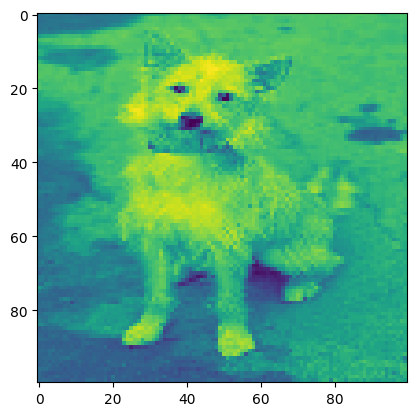

In [16]:
plt.imshow(data_Xscaled[0])

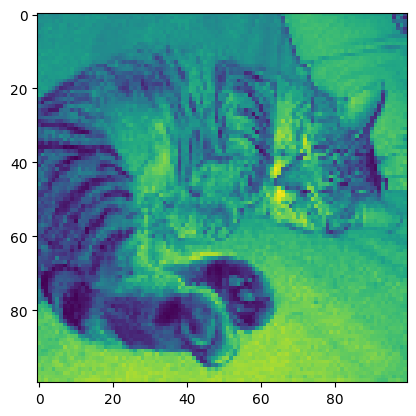

In [17]:
plt.imshow(data_Xscaled[2])

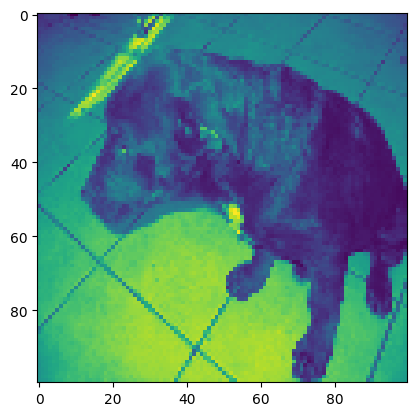

In [18]:
plt.imshow(data_Xscaled[4])

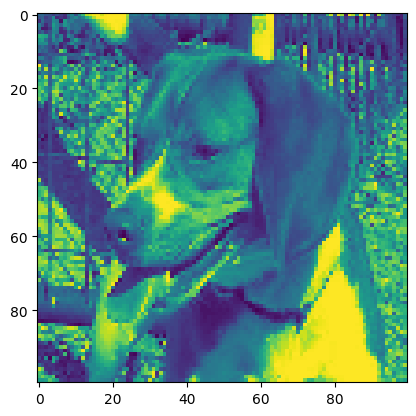

In [19]:
plt.imshow(data_Xscaled[6])

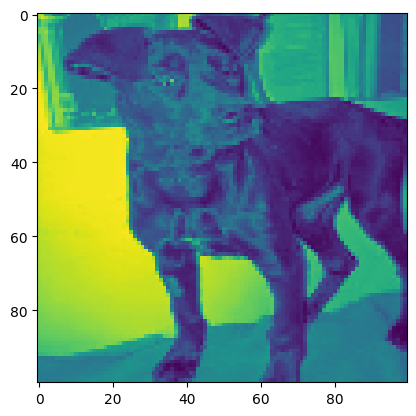

In [20]:
plt.imshow(data_Xscaled[8])

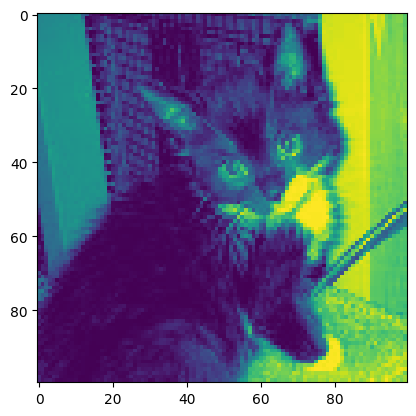

In [21]:
plt.imshow(data_Xscaled[10])

In [22]:
c = list(range(0,11,2))
c

[0, 2, 4, 6, 8, 10]

In [23]:
type(c)

list

In [24]:
# # UGGGGH I CAN'T GET THIS FOR LOOP TO WORK :(
# for i in range(c):
#   plt.imshow(data_Xscaled[i])

* Look at the response values in y for those images.

In [25]:
data_y[0:11:2] # looks like dogs == 0 and cats == 1

[0, 1, 0, 0, 0, 1]

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.

## Data Processing


version 00:

Here, I am trying to turn data_Xscaled from a numpy array to a list, then use the list to do a train_test_split.

data_y is still a list that is 24946 in length.

---

version 01:

 I will try to use Wil's method of slicing the data to get the same sized X and y data sets [:200]

* making testing sets

In [26]:
# making training set for data_X (first 200 inputs in array)
X = data_Xscaled[:200]
X

array([[[[0.37254902],
         [0.36862745],
         [0.38431373],
         ...,
         [0.66666667],
         [0.6745098 ],
         [0.67058824]],

        [[0.36078431],
         [0.35686275],
         [0.37254902],
         ...,
         [0.66666667],
         [0.6745098 ],
         [0.67058824]],

        [[0.34901961],
         [0.35686275],
         [0.36078431],
         ...,
         [0.64705882],
         [0.6627451 ],
         [0.6627451 ]],

        ...,

        [[0.32941176],
         [0.29803922],
         [0.28627451],
         ...,
         [0.52941176],
         [0.64313725],
         [0.60392157]],

        [[0.32156863],
         [0.30980392],
         [0.27843137],
         ...,
         [0.55686275],
         [0.5254902 ],
         [0.6       ]],

        [[0.31372549],
         [0.33333333],
         [0.33333333],
         ...,
         [0.59215686],
         [0.57254902],
         [0.54117647]]],


       [[[0.67058824],
         [0.60392157],
         [0.54

In [27]:
len(X)

200

In [28]:
# making training set for data_y (first 200 inputs in list)
y = data_y[:200]
y

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0]

In [29]:
len(y)

200

* Split X and y into training and testing sets.

In [30]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 13)

In [31]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((180, 100, 100, 1), (20, 100, 100, 1), 180, 20)

In [32]:
# turn y into numpy array (keeping the same names: y_train & y_test)
# probably not the best practice but it makes my life easy
y_train = np.array(y_train)
y_test = np.array(y_test)

In [33]:
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [34]:
# looking at shape for the train test split, now all 4 of them are np arrays
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((180, 100, 100, 1), (20, 100, 100, 1), (180,), (20,))

In [36]:
# # Define the scaler
# scaler = StandardScaler().fit(X_train)

# # Scale the train set
# X_train = scaler.transform(X_train)

# # Scale the test set
# X_test = scaler.transform(X_test)


*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.



* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.



* Fit your model using the training set.



* Evaluate your model using the testing set.



* Plot the distribution of probabilities for the testing set.



* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )



* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.



* Use the neural network you created to predict whether the image is a dog or a cat.



## Communication of Results



* Communicate the results of your analysis.



## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.